# Project: Sales Analysis of Amazon In The United States Of America

## Domain: Sales

## Organization: Vigor Council

### Intern Names: Kriti Khurana, Vaibhav Verma & Rishabh Garg


In [1]:
#importing python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Converting Series to DataFrame
def Series2DataFrame(s,c1,c2):
    return pd.DataFrame({c1:s.index,c2:s.values})

# Show labels in bar chart
def ShowLabels(ax):
    for data in ax.containers: ax.bar_label(data)

In [3]:
#importing the excel file
df=pd.read_excel("Amazon Data.xlsx")

In [4]:
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [6]:
#changing the data type
df['Sales']=df['Sales'].astype('int')
df['Profit']=df['Profit'].astype('int')

In [7]:
df.info() #with changes data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   int32         
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   int32         
dtypes: datetime64[ns](2), int32(2), int64(1), object(5)
memory usage: 225.3+ KB


In [8]:
df.head() #with changes data type

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14,2,6
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48,7,14
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7,4,1
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907,4,90
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18,3,5


In [9]:
df.shape

(3203, 10)

In [10]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [11]:
#check for null values
pd.isnull(df).sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [12]:
df[['Quantity','Sales','Profit']].describe()

,Quantity,Sales,Profit
count,3203.000000,3203.000000,3203.000000
mean,3.828910,225.904777,33.441773
std,2.260947,524.861795,174.019816
min,1.000000,0.000000,-3399.000000
25%,2.000000,19.000000,3.000000
50%,3.000000,60.000000,11.000000
75%,5.000000,215.000000,32.500000
max,14.000000,13999.000000,6719.000000


In [13]:
#Extracting the Country, City and State from Geography
df[['Country','City','State']]=df['Geography'].str.split(',',expand=True)
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Country,City,State
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14,2,6,United States,Los Angeles,California
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48,7,14,United States,Los Angeles,California
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7,4,1,United States,Los Angeles,California
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907,4,90,United States,Los Angeles,California
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18,3,5,United States,Los Angeles,California


# Exploratory Data Analysis

### 1) Sales by Category

Comparing the products sold based on the category to know the most sold category and the least sold category among users.

In [14]:
most_sold_category=df.groupby(['Category'],as_index=False)['Sales'].sum()
most_sold_category.sort_values(by='Sales', ascending=False,inplace=True)
most_sold_category.reset_index(drop=True,inplace=True)

print(most_sold_category)

       Category   Sales
0        Chairs  101673
1        Phones   98496
2        Tables   84696
3       Storage   70380
4   Accessories   60939
5       Binders   55713
6       Copiers   49725
7      Machines   42416
8     Bookcases   35951
9    Appliances   30154
10  Furnishings   29902
11        Paper   26384
12     Supplies   18089
13          Art    9079
14       Labels    5016
15    Envelopes    4077
16    Fasteners     883


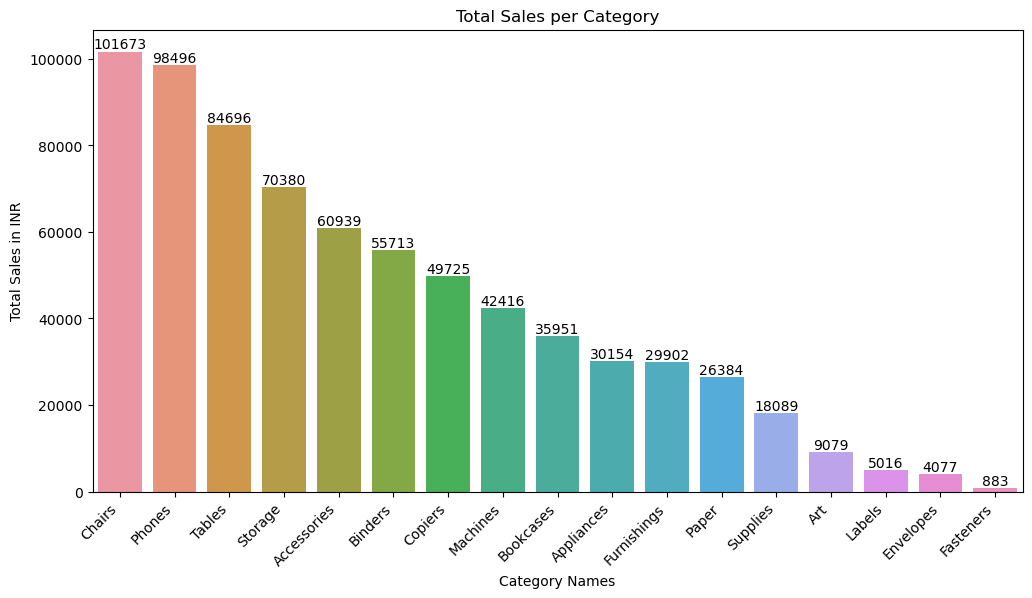

In [15]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=most_sold_category, x='Category', y='Sales')
plt.xlabel('Category Names')
plt.ylabel('Total Sales in INR')
plt.title('Total Sales per Category')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above visualization we can analyze that <b style='color:blue'>Chairs</b> is the <b>Most Sold Product Category</b> where as <b style='color:red'>Fasteners</b> is the <b>Lowest Sold Product Category</b> among users.*

### 2) Preference of Product Category
Comparing the quantity of products to check the most and the least preferred product category among users.

In [16]:
preferred_product_category=df.groupby(['Category'],as_index=False)['Quantity'].sum()
preferred_product_category.sort_values(by='Quantity', ascending=False,inplace=True)
preferred_product_category.reset_index(drop=True,inplace=True)

print(preferred_product_category)

       Category  Quantity
0       Binders      1868
1         Paper      1702
2   Furnishings      1175
3        Phones      1066
4       Storage      1039
5   Accessories      1032
6           Art       926
7        Chairs       734
8    Appliances       492
9        Tables       481
10       Labels       480
11    Bookcases       306
12    Fasteners       263
13     Supplies       238
14    Envelopes       227
15     Machines       147
16      Copiers        88


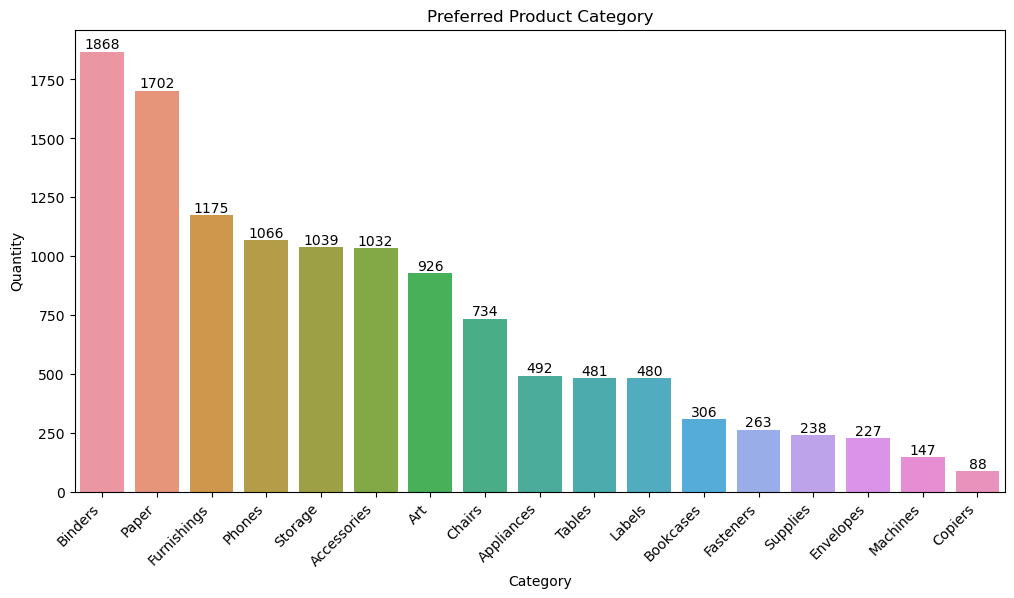

In [17]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=preferred_product_category, x='Category', y='Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Preferred Product Category')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above visualization we can analyze that <b style='color:blue'>Binders</b> category was <b>the highest quantity sold</b> making it <b>the most preferred product category</b> and <b style='color:red'>Copiers</b> has <b>the lowest quantity</b> making it the <b>least preferred product category</b> among users.*

### 3) Demand Analysis on the basis of State
Comparing the count of the users according to their states to know the demand for product categories.

In [18]:
demand_analysis_state=df.groupby(['State'],as_index=False)['Category'].count()
demand_analysis_state.sort_values(by='Category', ascending=False,inplace=True)
demand_analysis_state.reset_index(drop=True,inplace=True)

print(demand_analysis_state)

         State  Category
0   California      2001
1   Washington       506
2      Arizona       224
3     Colorado       182
4       Oregon       124
5         Utah        53
6       Nevada        39
7   New Mexico        37
8        Idaho        21
9      Montana        15
10     Wyoming         1


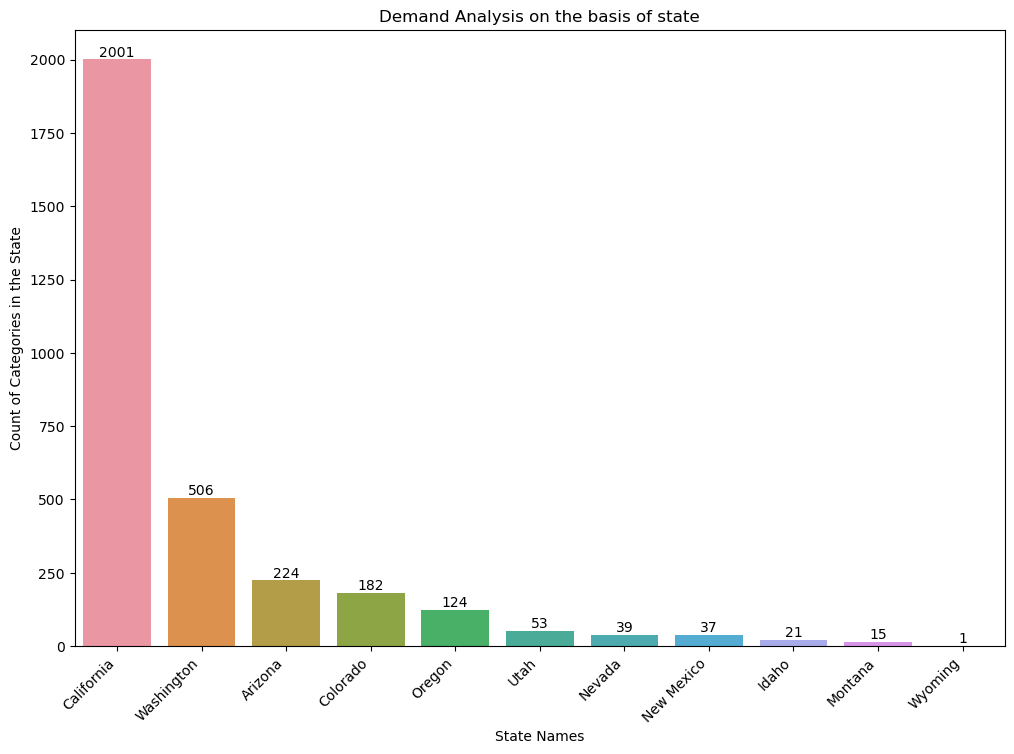

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='State',data=df,order = df['State'].value_counts().index)
plt.xlabel('State Names')
plt.ylabel('Count of Categories in the State')
plt.title('Demand Analysis on the basis of state')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)

#### Research Analysis on the above insight
*From the above graph we can see that the <b style='color:blue'>California</b> state has <b>the highest demand</b> and <b style='color:red'>Wyoming</b> has <b>the lowest demand in product categories.</b>*

### 4) Demand Analysis on the basis of City
Comparing the count of the users according to their city to know the demand for product categories.

In [20]:
demand_analysis_city = df.groupby(['City'], as_index=False)['Category'].count()
demand_analysis_city.sort_values(by='Category', ascending=False,inplace=True)
demand_analysis_city.reset_index(drop=True,inplace=True)

print(demand_analysis_city)

              City  Category
0      Los Angeles       747
1    San Francisco       510
2          Seattle       428
3        San Diego       170
4          Phoenix        63
..             ...       ...
164          Davis         1
165    Santa Maria         1
166         Dublin         1
167        Everett         1
168       Murrieta         1

[169 rows x 2 columns]


In [21]:
#top 5 highest values
highest_demand_cities=demand_analysis_city.sort_values(by='Category', ascending=False).head()

print(highest_demand_cities)

            City  Category
0    Los Angeles       747
1  San Francisco       510
2        Seattle       428
3      San Diego       170
4        Phoenix        63


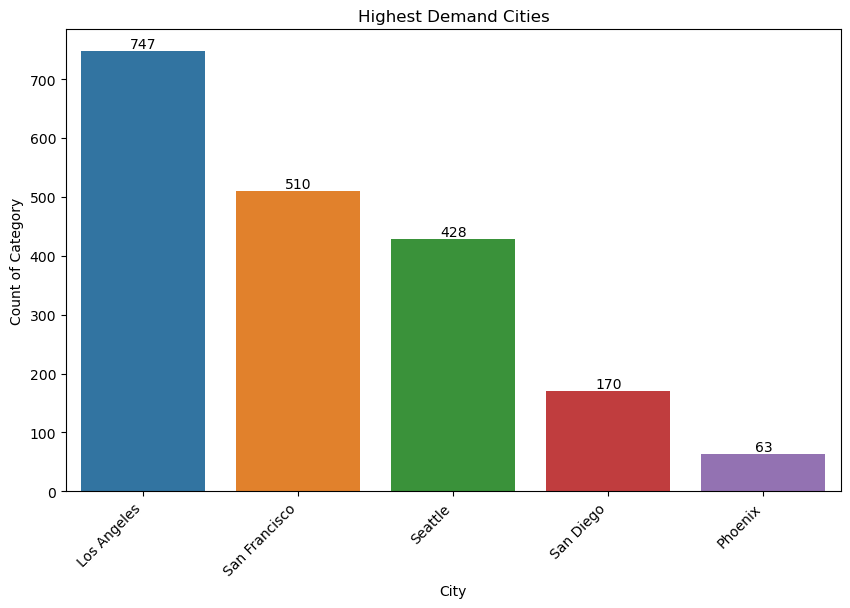

In [23]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=highest_demand_cities, x='City', y='Category')
plt.xlabel('City')
plt.ylabel('Count of Category')
plt.title('Highest Demand Cities')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

*From the above graph we can see that the <b style='color:blue'>Los Angeles</b> city has <b>the highest demand</b>.*

In [25]:
#top 5 lowest values
lowest_demand_cities=demand_analysis_city.sort_values(by='Category', ascending=True).head()
lowest_demand_cities.reset_index(drop=True,inplace=True)

print(lowest_demand_cities)

       City  Category
0  Murrieta         1
1  Whittier         1
2   Antioch         1
3   Ontario         1
4  Lewiston         1


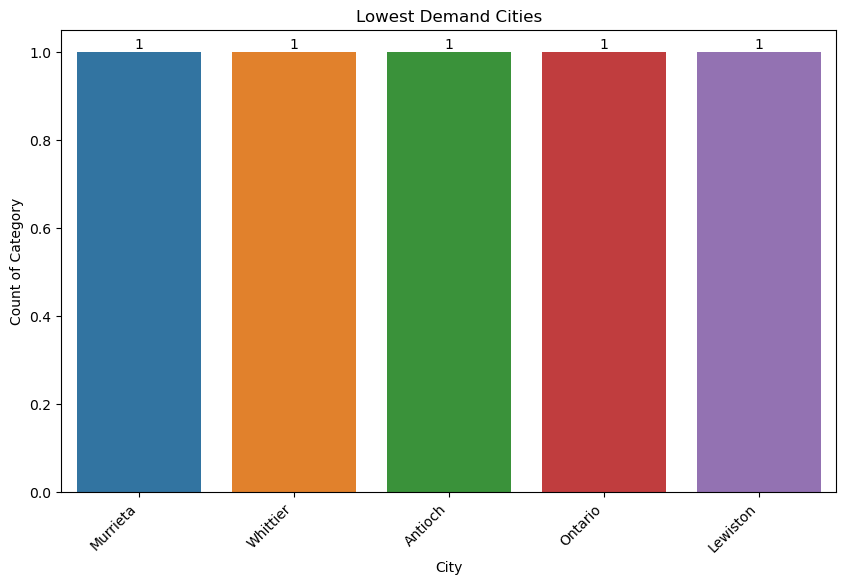

In [26]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=lowest_demand_cities, x='City', y='Category')
plt.xlabel('City')
plt.ylabel('Count of Category')
plt.title('Lowest Demand Cities')
plt.xticks(rotation=45, ha='right')
ShowLabels(ax)
plt.show()

*However, there are many cities with <b>the lowest demands</b> namely <b style='color:red'>Redding</b>, <b style='color:red'>Cheyenne</b>, <b style='color:red'>Citrus Heights</b>, <b style='color:red'>Commerce City</b> and <b style='color:red'>Redwood City</b>.*

### 5) Profitability Analysis on the basis of State
Comparing the states in terms of profit to know the most profitable and the most non-profitable state in the United States of America.

In [28]:
profitability_analysis_states=df.groupby(['State'],as_index=False)['Profit'].sum()
profitability_analysis_states.sort_values(by='Profit', ascending=False,inplace=True)
profitability_analysis_states.reset_index(drop=True,inplace=True)

print(profitability_analysis_states)

         State  Profit
0   California   75466
1   Washington   33160
2       Nevada    3299
3         Utah    2519
4      Montana    1825
5   New Mexico    1142
6        Idaho     816
7      Wyoming     100
8       Oregon   -1212
9      Arizona   -3458
10    Colorado   -6543


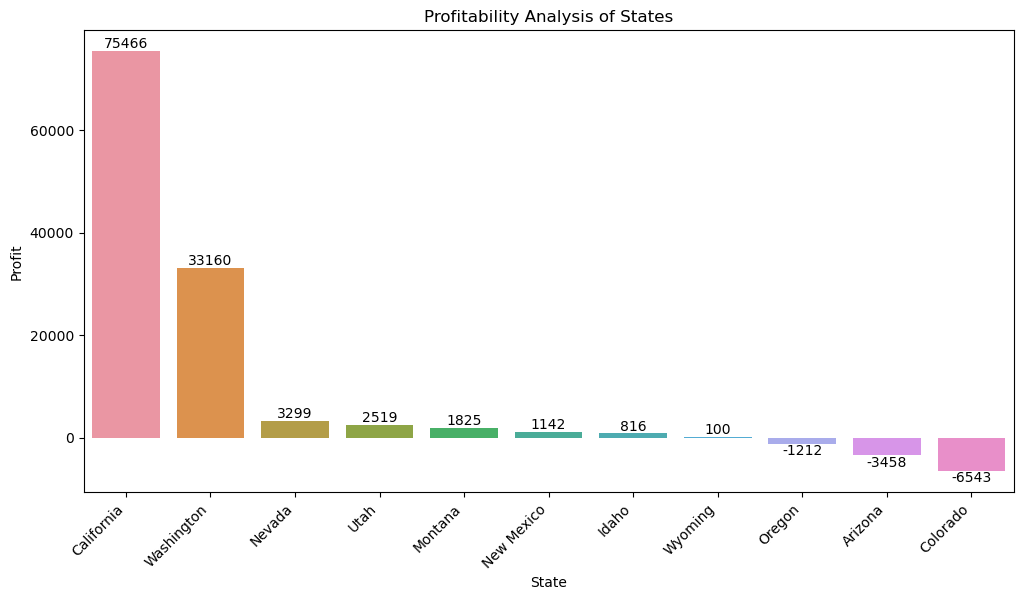

In [29]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=profitability_analysis_states, x='State', y='Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profitability Analysis of States')
plt.xticks(rotation=45, ha='right')
for data in ax.containers: ax.bar_label(data)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most profitable state</b> is <b style='color:blue'>California</b> and <b>the most non-profitable state</b> is <b style='color:red'>Colorado</b>.*

### 6) Profitability Analysis on the basis of City
Comparing the cities in terms of profit to know the most profitable and non-profitable city in the United States of America.

In [27]:
profitability_analysis_city= df.groupby(['City'], as_index=False)['Profit'].sum()
profitability_analysis_city.sort_values(by='Profit', ascending=False,inplace=True)
profitability_analysis_city.reset_index(drop=True,inplace=True)

print(profitability_analysis_city)

                 City  Profit
0         Los Angeles   30099
1             Seattle   28952
2       San Francisco   17278
3           San Diego    6304
4     North Las Vegas    2241
..                ...     ...
164       Springfield    -863
165            Pueblo    -901
166  Colorado Springs    -959
167           Phoenix   -2793
168        Louisville   -3408

[169 rows x 2 columns]


In [28]:
#top 5 profitable cities
profitable_cities=profitability_analysis_city.sort_values(by='Profit', ascending=False).head()

print(profitable_cities)

              City  Profit
0      Los Angeles   30099
1          Seattle   28952
2    San Francisco   17278
3        San Diego    6304
4  North Las Vegas    2241


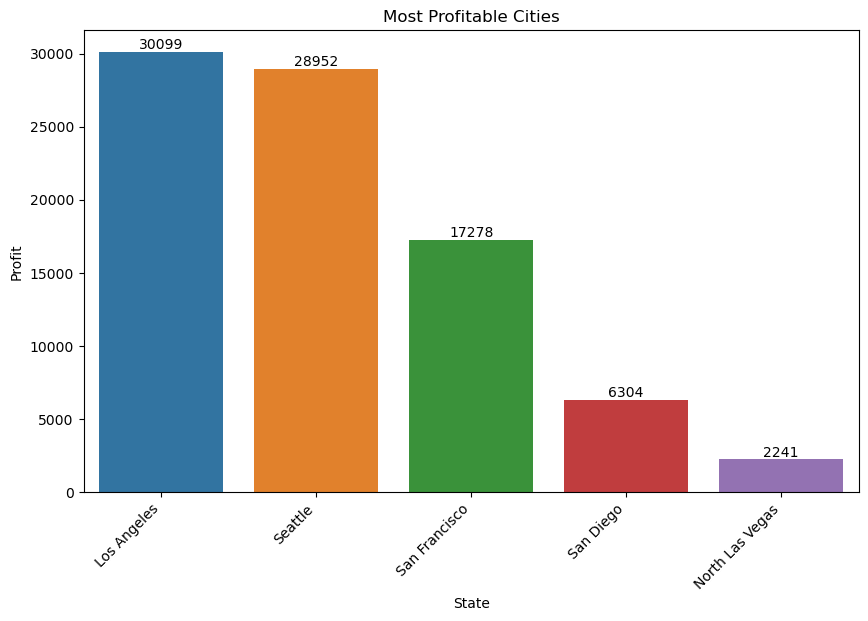

In [29]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=profitable_cities, x='City', y='Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Most Profitable Cities')
plt.xticks(rotation=45, ha='right') 
for data in ax.containers: ax.bar_label(data)
plt.show()

*From the above graph we can see that <b style='color:blue'>Los Angeles</b> is <b>the most profitable city</b>.*

In [30]:
#top 5 non-profitable cities
nonprofitable_cities=profitability_analysis_city.sort_values(by='Profit', ascending=True).head()
nonprofitable_cities.reset_index(drop=True,inplace=True)

print(nonprofitable_cities)

               City  Profit
0        Louisville   -3408
1           Phoenix   -2793
2  Colorado Springs    -959
3            Pueblo    -901
4       Springfield    -863


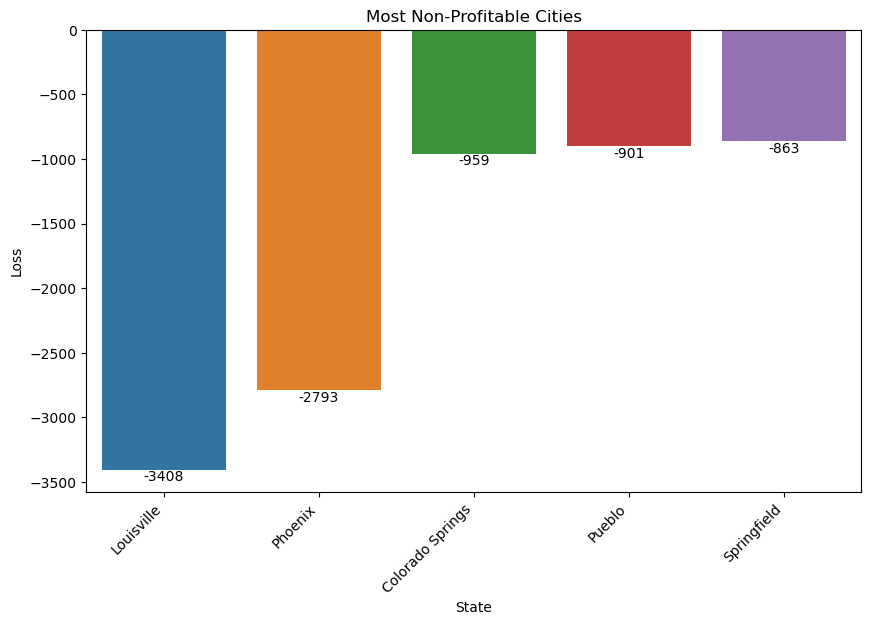

In [32]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=nonprofitable_cities, x='City', y='Profit')
plt.xlabel('State')
plt.ylabel('Loss')
plt.title('Most Non-Profitable Cities')
plt.xticks(rotation=45, ha='right') 
for data in ax.containers: ax.bar_label(data)
plt.show()

*From the above graph we can see that<b style='color:red'>Louisville</b> is <b>the most non-profitable city</b>.*

### 7) Profitability Analysis on the basis of year
Comparing the increase in profit by every year.

In [33]:
#checking the yearly profit
yearly_profit = df.groupby(df['Order Date'].dt.year)['Profit'].sum()
print(yearly_profit)

Order Date
2011    19795
2012    20234
2013    23643
2014    43442
Name: Profit, dtype: int32


In [34]:
# Calculate the increase in profit by year
profit_increase = yearly_profit.diff()
profit_increase = profit_increase.fillna(0)
print(profit_increase)

Order Date
2011        0.0
2012      439.0
2013     3409.0
2014    19799.0
Name: Profit, dtype: float64


In [35]:
# Getting data from a series
print(profit_increase.index)
print(profit_increase.values)

Index([2011, 2012, 2013, 2014], dtype='int32', name='Order Date')
[    0.   439.  3409. 19799.]


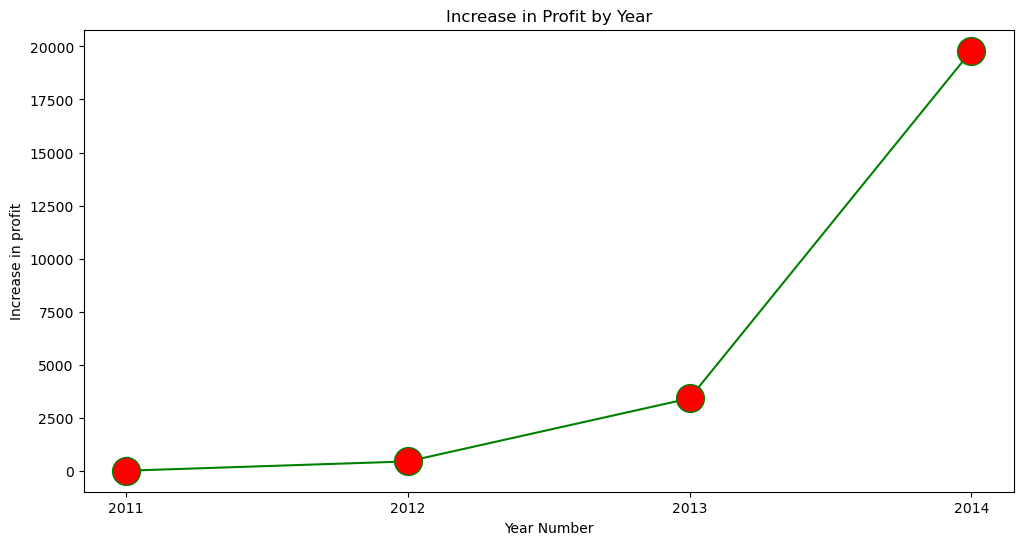

In [36]:
plt.figure(figsize=(12,6))
line=plt.plot(profit_increase.index,profit_increase.values,marker='o',color='green',ms=20,mfc='r')
plt.xticks(profit_increase.index)
plt.xlabel('Year Number')
plt.ylabel('Increase in profit')
plt.title('Increase in Profit by Year')
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that there was <b>an steady increase in profit every year</b> but <b style='color:blue'>from 2013 to 2014</b> their is <b>an increadible spike in profits</b>.*

### 8) Profitability Analysis on the basis of quarters of each year.
Comparing the increase in profit in every quarter of each year to know the most profitable and the most non profitable quarter.

In [37]:
df['Quarter']=df['Order Date'].dt.to_period('Q')
quarterly_profit=df.groupby(['Quarter'],as_index=False)['Profit'].sum()

print(quarterly_profit)

   Quarter  Profit
0   2011Q1    1755
1   2011Q2    4223
2   2011Q3    7497
3   2011Q4    6320
4   2012Q1    5246
5   2012Q2    3951
6   2012Q3    3651
7   2012Q4    7386
8   2013Q1    2209
9   2013Q2    4050
10  2013Q3    8408
11  2013Q4    8976
12  2014Q1   13965
13  2014Q2    3477
14  2014Q3   15117
15  2014Q4   10883


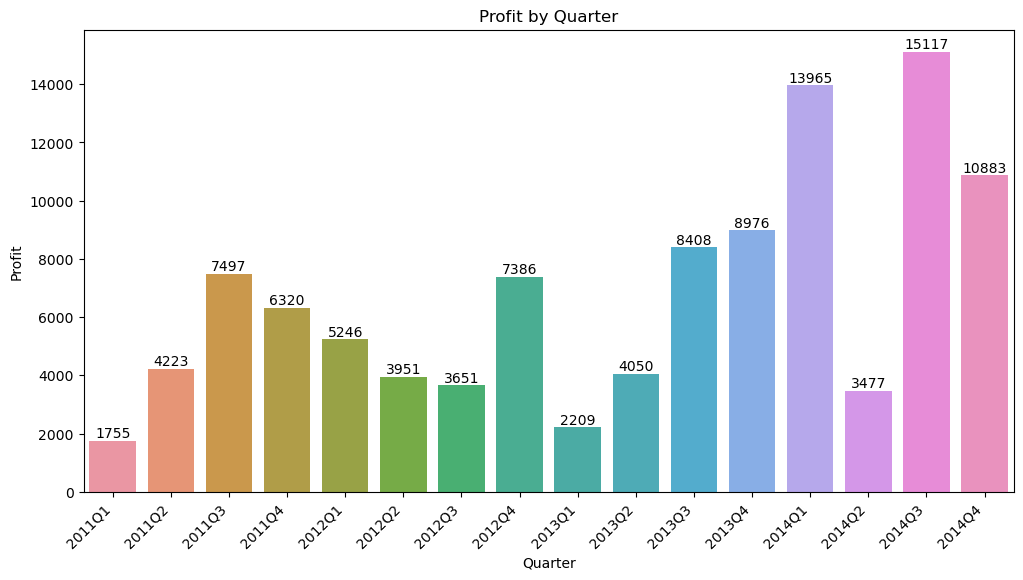

In [38]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=quarterly_profit, x='Quarter', y='Profit')
plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Profit by Quarter')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most profitable quarter</b> was <b style='color:blue'>the 3rd quarter of 2014</b> and <b>the most non-profitable quarter</b> was <b style='color:red'>the 1st quarter of 2011</b>.*

### 9) Profitability Analysis on the basis of months of the years.
Comparing the increase in profit in every month of each year.

In [39]:
#2011 data
monthly_profit_2011 = df[df['Order Date'].dt.year == 2011].groupby(df['Order Date'].dt.month)['Profit'].sum()

# Converting Series to DataFrame
monthly_profit_2011=Series2DataFrame(monthly_profit_2011,'Month','Profit')
print(monthly_profit_2011)

    Month  Profit
0       1      17
1       2     223
2       3    1515
3       4    1606
4       5     860
5       6    1757
6       7    1923
7       8    2535
8       9    3039
9      10    1368
10     11    3112
11     12    1840


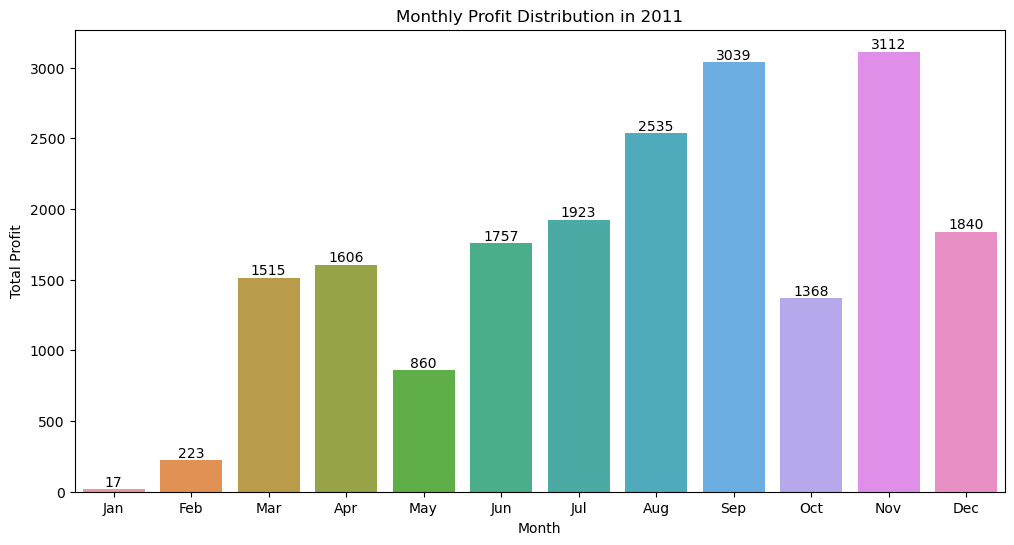

In [40]:
#2011 graph
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=monthly_profit_2011, x='Month', y='Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Distribution in 2011')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight

*From the above graph we can see that <b>the most profit month of the year 2011</b> is <b style='color:blue'>November</b> followed by <b style='color:red'>September</b>.*

In [41]:
#2012 data
monthly_profit_2012 = df[df['Order Date'].dt.year == 2012].groupby(df['Order Date'].dt.month)['Profit'].sum()

# Converting Series to DataFrame
monthly_profit_2012=Series2DataFrame(monthly_profit_2012,'Month','Profit')
print(monthly_profit_2012)

    Month  Profit
0       1     595
1       2     431
2       3    4220
3       4    1311
4       5    1621
5       6    1019
6       7      17
7       8    1217
8       9    2417
9      10    1759
10     11    1718
11     12    3909


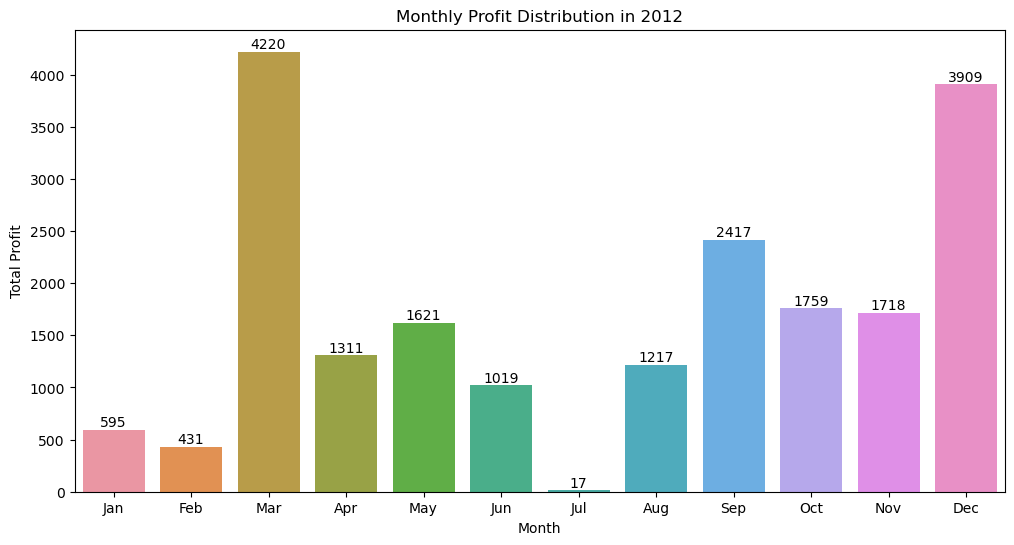

In [42]:
#2012 graph
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=monthly_profit_2012, x='Month', y='Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Distribution in 2012')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight

*From the above graph we can see that <b>the most profit month of the year 2012</b> is <b style='color:blue'>March</b> followed by <b style='color:red'>December</b>.*

In [43]:
#2013 data
monthly_profit_2013 = df[df['Order Date'].dt.year == 2013].groupby(df['Order Date'].dt.month)['Profit'].sum()

# Converting Series to DataFrame
monthly_profit_2013=Series2DataFrame(monthly_profit_2013,'Month','Profit')
print(monthly_profit_2013)

    Month  Profit
0       1     635
1       2     379
2       3    1195
3       4     315
4       5    1491
5       6    2244
6       7    2955
7       8    1229
8       9    4224
9      10    1041
10     11    4750
11     12    3185


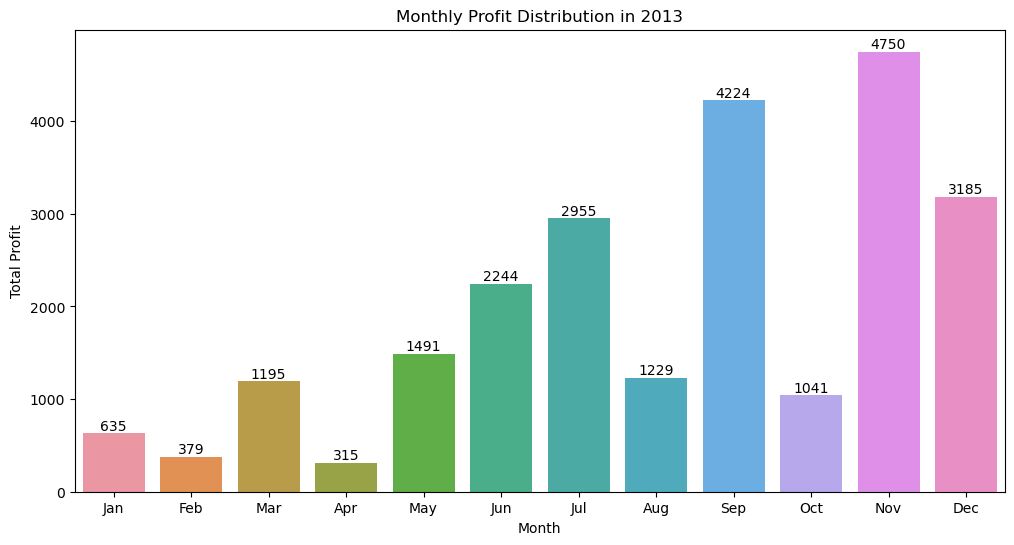

In [44]:
#2013 graph
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=monthly_profit_2013, x='Month', y='Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Distribution in 2013')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight

*From the above graph we can see that <b>the most profit month of the year 2013</b> is <b style='color:blue'>November</b> followed by <b style='color:red'>September</b>.*

In [45]:
#2014 data
monthly_profit_2014 = df[df['Order Date'].dt.year == 2014].groupby(df['Order Date'].dt.month)['Profit'].sum()

# Converting Series to DataFrame
monthly_profit_2014=Series2DataFrame(monthly_profit_2014,'Month','Profit')
print(monthly_profit_2014)

    Month  Profit
0       1    3275
1       2    1627
2       3    9063
3       4   -1885
4       5    2744
5       6    2618
6       7    4302
7       8    5983
8       9    4832
9      10    3386
10     11    3381
11     12    4116


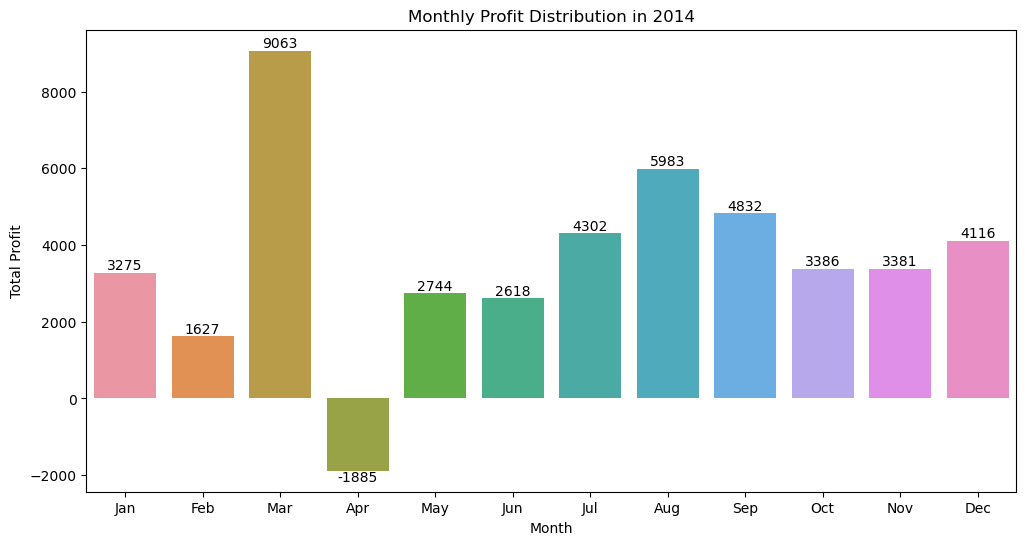

In [46]:
#2014 graph
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=monthly_profit_2014, x='Month', y='Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Distribution in 2014')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight

*From the above graph we can see that <b>the most profit month of the year 2014</b> is <b style='color:blue'>March</b> followed by <b style='color:red'>August</b>.*

### 10) Sales Analysis on the basis of year
Comparing the increase in sales by every year.

In [43]:
#checking the yearly sales
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
print(yearly_sales)

Order Date
2011    147500
2012    139586
2013    186508
2014    249979
Name: Sales, dtype: int32


In [44]:
# Calculate the increase in sales by year
sales_increase = yearly_sales.diff()
sales_increase = sales_increase.fillna(0)
print(sales_increase)

Order Date
2011        0.0
2012    -7914.0
2013    46922.0
2014    63471.0
Name: Sales, dtype: float64


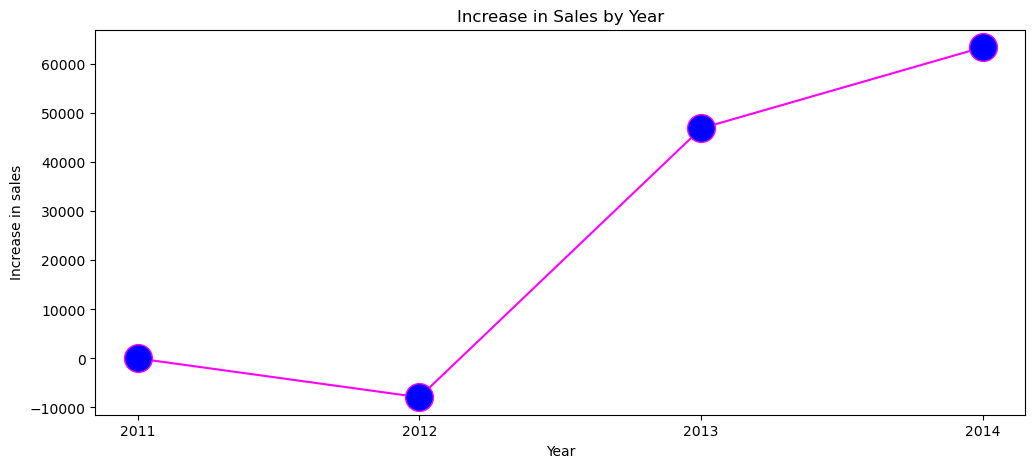

In [45]:
plt.figure(figsize=(12,5))
plt.plot(sales_increase.index, sales_increase.values,marker='o',color='magenta',ms=20,mfc='blue')
plt.xlabel('Year')
plt.ylabel('Increase in sales')
plt.title('Increase in Sales by Year')
plt.xticks(sales_increase.index)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b style='color:blue'>the year 2011 have seen declined in sales</b> till <b style='color:red'>2012 in which it has also touched the negative marking</b> but after that there is <b style='color:green'>a spike increase in the sales till 2013 and a firm increase in sales till 2014</b>.*

### 11) Sales Analysis on the basis of quarters of each year.
Comparing the increase in sales in every quarter of each year to know the highest and lowest sales quarter.

In [46]:
df['Quarter']=df['Order Date'].dt.to_period('Q')
quarterly_sales=df.groupby(['Quarter'],as_index=False)['Sales'].sum()
print(quarterly_sales)

   Quarter  Sales
0   2011Q1  14963
1   2011Q2  25484
2   2011Q3  49839
3   2011Q4  57214
4   2012Q1  23451
5   2012Q2  26109
6   2012Q3  33443
7   2012Q4  56583
8   2013Q1  24266
9   2013Q2  39679
10  2013Q3  50582
11  2013Q4  71981
12  2014Q1  51284
13  2014Q2  44182
14  2014Q3  74598
15  2014Q4  79915


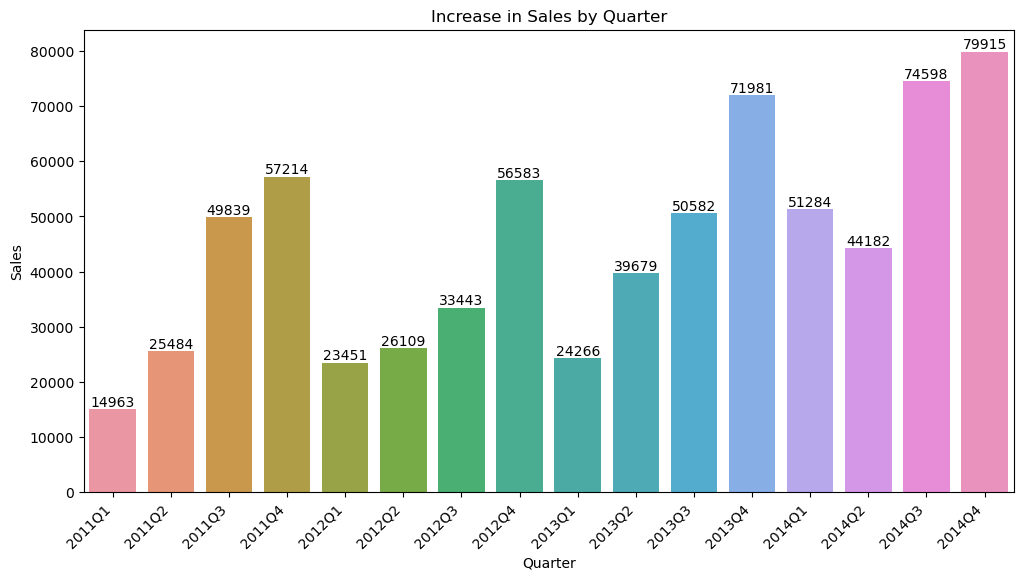

In [47]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=quarterly_sales, x='Quarter', y='Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Increase in Sales by Quarter')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the highest sales</b> were made in <b style='color:blue'>4th quarter of 2014</b> and <b>the lowest sales</b> were made in <b style='color:red'>1st quarter of 2011</b>.*

### 12) Sales Analysis on the basis of months of the years.
Comparing the increase in sales in every month of each year.

In [48]:
#2011 data
monthly_sales_2011 = df[df['Order Date'].dt.year == 2011].groupby(df['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2011=Series2DataFrame(monthly_sales_2011,'Month','Sale')
print(monthly_sales_2011)

    Month   Sale
0       1   2641
1       2   1338
2       3  10984
3       4   9318
4       5   6551
5       6   9615
6       7  21773
7       8  13212
8       9  14854
9      10   8693
10     11  23124
11     12  25397


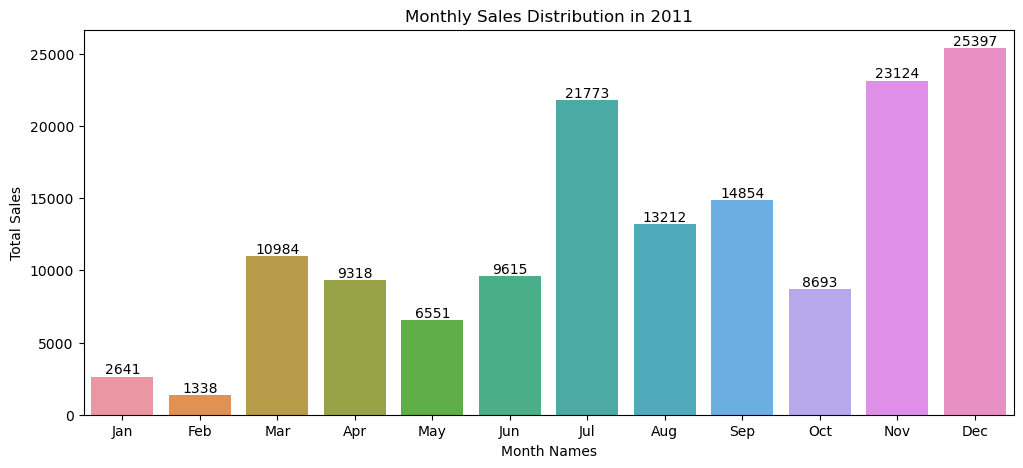

In [49]:
#2011 graph
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=monthly_sales_2011,x='Month',y='Sale')
plt.xlabel('Month Names')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution in 2011')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most sales</b> in 2011 were held in the month of <b style='color:blue'>December</b> followed by <b style='color:red'>November</b>.*

In [47]:
 #2012 data
monthly_sales_2012 = df[df['Order Date'].dt.year == 2012].groupby(df['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2012=Series2DataFrame(monthly_sales_2012,'Month','Sale')
print(monthly_sales_2012)

    Month   Sale
0       1   6019
1       2   1995
2       3  15437
3       4   9027
4       5  12016
5       6   5066
6       7   7073
7       8  12523
8       9  13847
9      10  13976
10     11  14492
11     12  28115


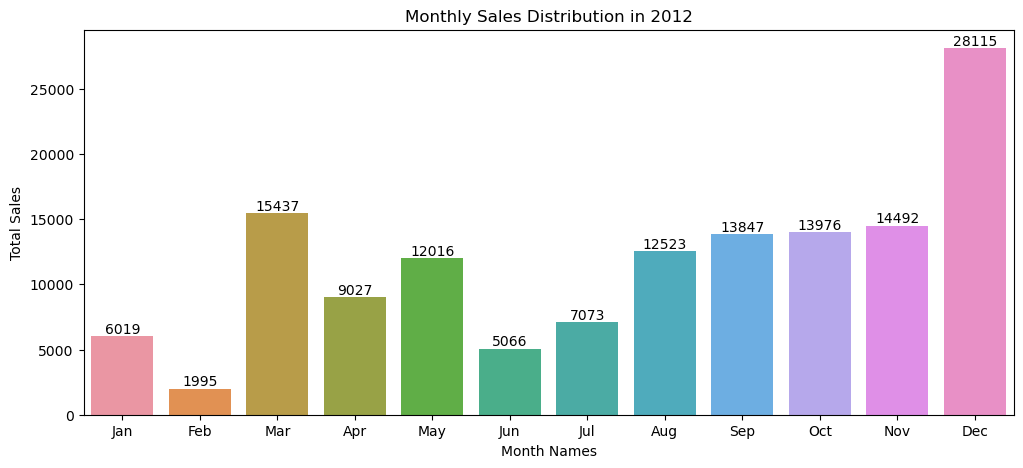

In [48]:
#2012 graph
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=monthly_sales_2012,x='Month',y='Sale')
plt.xlabel('Month Names')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution in 2012')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most sales</b> in 2012 were held in the month of <b style='color:blue'>December</b> followed by <b style='color:red'>March</b>.*

In [49]:
 #2013 data
monthly_sales_2013 = df[df['Order Date'].dt.year == 2013].groupby(df['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2013=Series2DataFrame(monthly_sales_2013,'Month','Sale')
print(monthly_sales_2013)

    Month   Sale
0       1   3642
1       2   3088
2       3  17536
3       4  10342
4       5  10776
5       6  18561
6       7  14377
7       8  12650
8       9  23555
9      10  13100
10     11  26352
11     12  32529


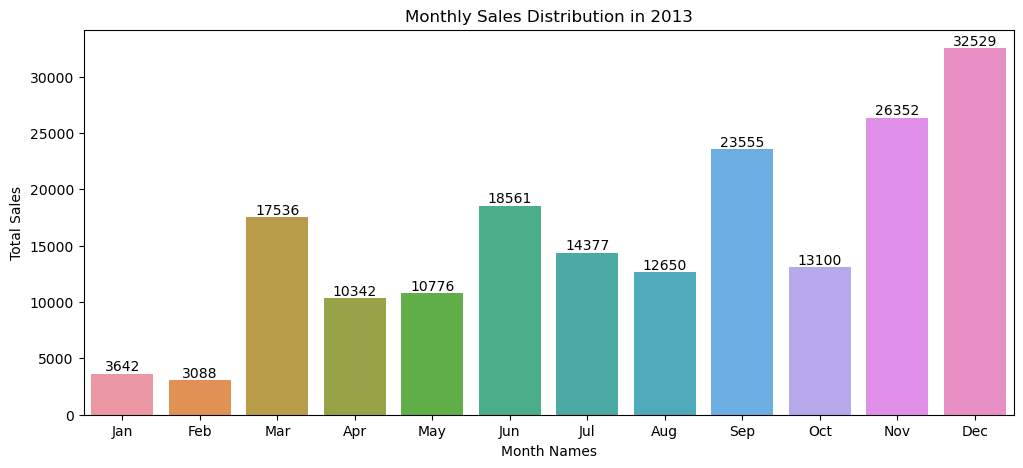

In [50]:
#2013 graph
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=monthly_sales_2013,x='Month',y='Sale')
plt.xlabel('Month Names')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution in 2013')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most sales</b> in 2013 were held in the month of <b style='color:blue'>December</b> followed by <b style='color:red'>November</b>.*

In [51]:
 #2014 data
monthly_sales_2014 = df[df['Order Date'].dt.year == 2014].groupby(df['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2014=Series2DataFrame(monthly_sales_2014,'Month','Sale')
print(monthly_sales_2014)

    Month   Sale
0       1  12551
1       2   9787
2       3  28946
3       4  13167
4       5  15854
5       6  15161
6       7  21349
7       8  24147
8       9  29102
9      10  21492
10     11  28834
11     12  29589


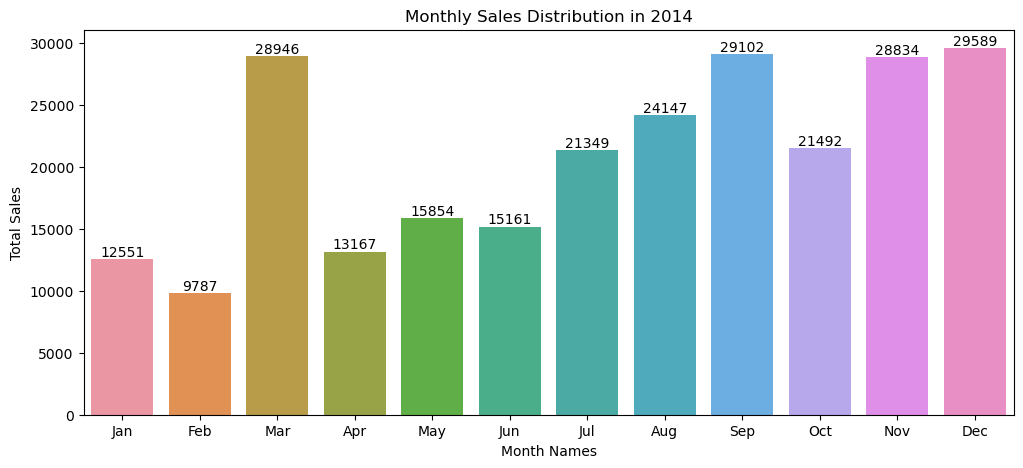

In [52]:
#2014 graph
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=monthly_sales_2014,x='Month',y='Sale')
plt.xlabel('Month Names')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution in 2014')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most sales</b> in 2014 were held in the month of <b style='color:blue'>December</b> followed by <b style='color:red'>September</b>.*

### 13) Product Sales Analysis on the basis of State
Comparing the sales of products on the basis of states to know the highest and lowest product sold state.

In [57]:
productsales_analysis_states=df.groupby(['State'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
print(productsales_analysis_states)

         State   Sales
1   California  456493
9   Washington  138332
0      Arizona   35156
2     Colorado   32008
7       Oregon   17368
5       Nevada   16707
8         Utah   11187
4      Montana    5581
6   New Mexico    4766
3        Idaho    4372
10     Wyoming    1603


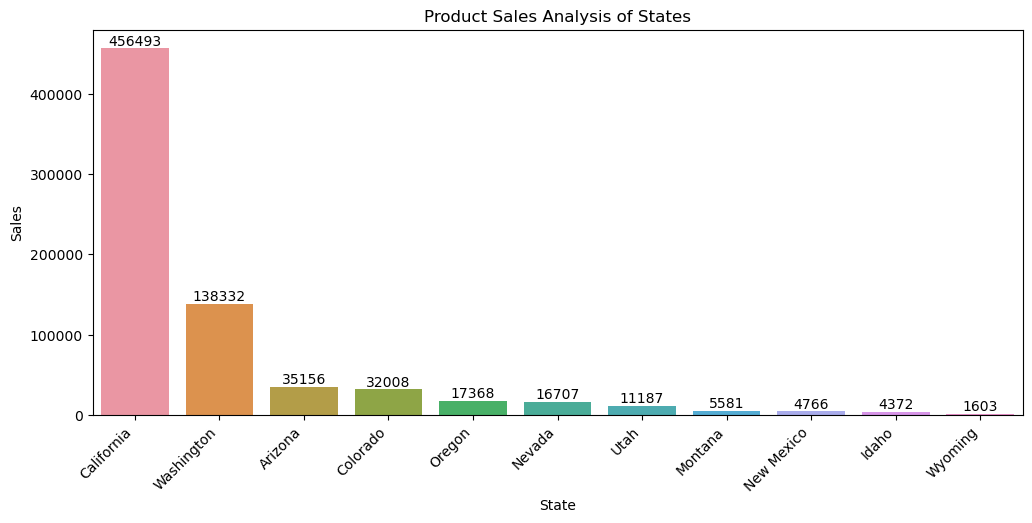

In [58]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=productsales_analysis_states, x='State', y='Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Product Sales Analysis of States')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above sight
*From the above graph we can see that <b>the highest product sales state</b> is <b style='color:blue'>California</b> and <b>the lowest product sold state</b> is <b style='color:red'>'Wyoming'</b>.*

### 14) Product Sales Analysis on the basis of Cities
Comparing the sales of products on the basis of cities to know the highest and lowest product sold city.

In [52]:
productsales_analysis_cities=df.groupby(['City'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
print(productsales_analysis_cities)

                City   Sales
80       Los Angeles  175414
144          Seattle  119280
133    San Francisco  112357
132        San Diego   47420
35            Denver   12174
..               ...     ...
11          Billings       8
5             Auburn       4
71            Layton       4
45           Everett       3
136  San Luis Obispo       3

[169 rows x 2 columns]


In [53]:
#top 5 lowest product sales cities
lowest_productsales_cities=productsales_analysis_cities.tail().sort_values(by='Sales')
print(lowest_productsales_cities)


                City  Sales
45           Everett      3
136  San Luis Obispo      3
5             Auburn      4
71            Layton      4
11          Billings      8


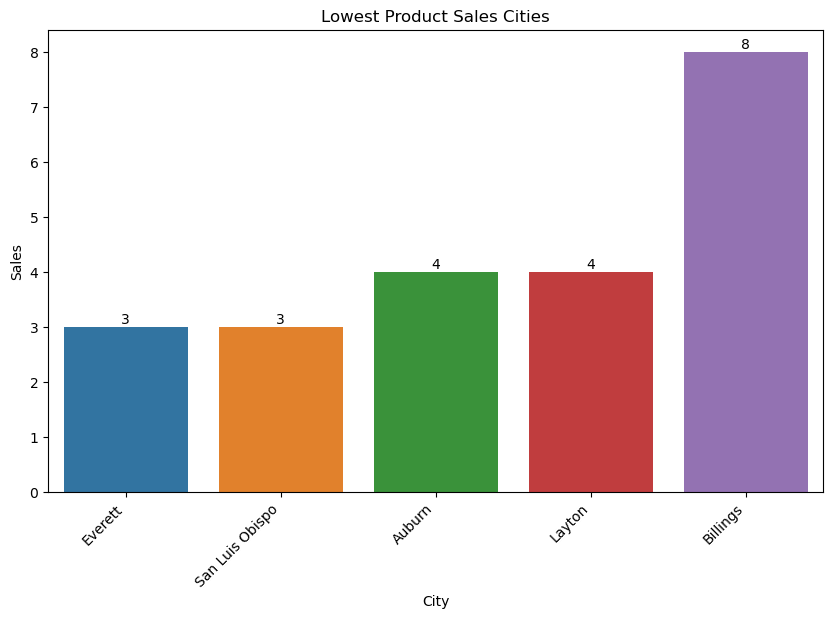

In [60]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=lowest_productsales_cities, x='City', y='Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Lowest Product Sales Cities')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

*From the above graph we can see that <b>the lowest product sales cities</b> are <b style='color:blue'>Everett</b> and <b style='color:red'>San Luis Obispo.*

In [61]:
#top 5 highest product sales cities
highest_productsales_cities=productsales_analysis_cities.head()
print(highest_productsales_cities)

              City   Sales
80     Los Angeles  175414
144        Seattle  119280
133  San Francisco  112357
132      San Diego   47420
35          Denver   12174


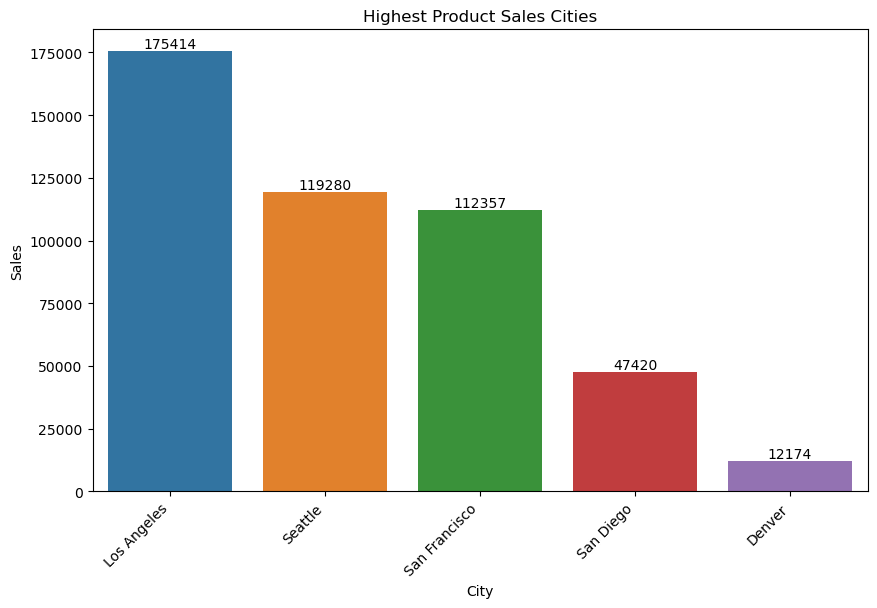

In [63]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=highest_productsales_cities, x='City', y='Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Highest Product Sales Cities')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

*From the above graph we can see that <b>the highest product sales city</b> is <b style='color:blue'>Los Angeles.*

### 15) Gap Analysis on the basis of states
Comparing the average gap in the order date and shipment date of all the states to know the highest and the lowest gap state.

In [69]:
df['Shipping_Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delay_by_state = df.groupby('State')['Shipping_Delay'].mean().reset_index()
print(avg_delay_by_state)

         State  Shipping_Delay
0      Arizona        4.071429
1   California        3.868066
2     Colorado        3.681319
3        Idaho        3.666667
4      Montana        4.600000
5       Nevada        4.384615
6   New Mexico        4.513514
7       Oregon        4.314516
8         Utah        4.358491
9   Washington        3.974308
10     Wyoming        5.000000


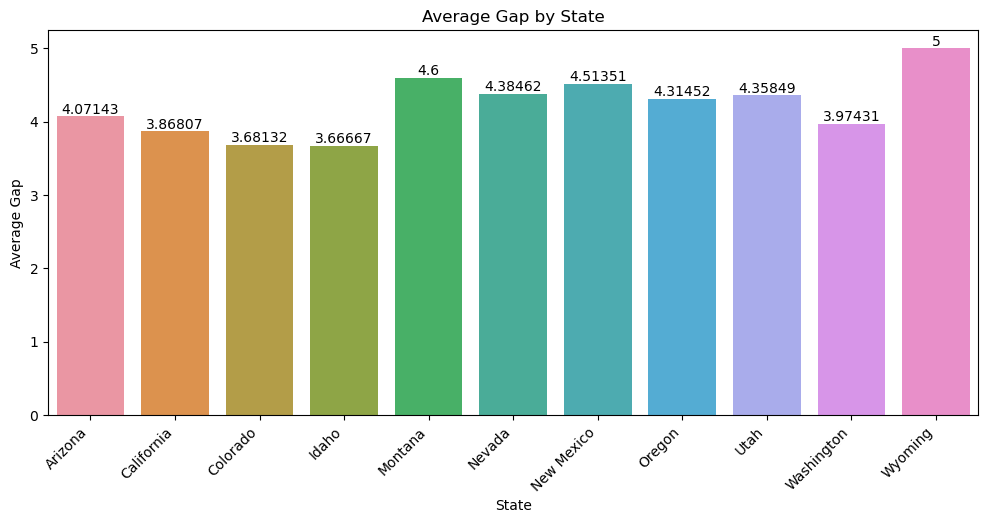

In [70]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=avg_delay_by_state, x='State', y='Shipping_Delay')
plt.xlabel('State')
plt.ylabel('Average Gap')
plt.title('Average Gap by State')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most average gap state</b> is <b style='color:blue'>Wyoming</b> and <b>the least average gap state</b> is <b style='color:red'>Idaho</b>.*

### 16) Gap Analysis on the basis of cities
Comparing the average gap in the order date and shipment date of all the cities to know the highest gap and the lowest gap city.

In [71]:
df['Shipping_Delay_Cities'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delay_by_cities = df.groupby('City')['Shipping_Delay'].mean().reset_index()
print(avg_delay_by_cities)

             City  Shipping_Delay
0     Albuquerque        4.642857
1         Anaheim        2.296296
2         Antioch        1.000000
3    Apple Valley        2.428571
4          Arvada        2.000000
..            ...             ...
164   Westminster        3.882353
165      Whittier        5.000000
166      Woodland        2.666667
167       Yucaipa        7.000000
168          Yuma        2.000000

[169 rows x 2 columns]


In [72]:
#least delay in cities
least_delay=avg_delay_by_cities.sort_values(by='Shipping_Delay', ascending=True).head().reset_index()
print(least_delay)

   index      City  Shipping_Delay
0     11  Billings           0.000
1    117  Redlands           0.875
2      2   Antioch           1.000
3     94    Murray           1.000
4    114    Pueblo           1.250


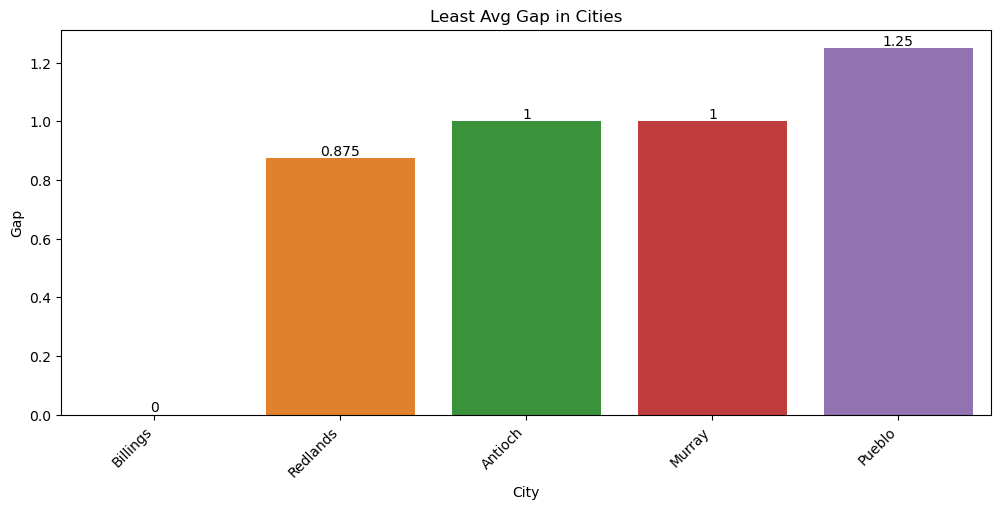

In [73]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=least_delay, x='City', y='Shipping_Delay')
plt.xlabel('City')
plt.ylabel('Gap')
plt.title('Least Avg Gap in Cities')
plt.xticks(rotation=45, ha='right')
ShowLabels(ax)
plt.show()

*From the above graph we can see that <b>the least average gap city</b> is <b style='color:blue'>Billings</b> with <b style='color:red'>zero gap</b>.*

In [74]:
#most delay in cities
most_delay=avg_delay_by_cities.sort_values(by='Shipping_Delay', ascending=False).head()
print(most_delay)

               City  Shipping_Delay
25   Citrus Heights        7.000000
167         Yucaipa        7.000000
75             Lodi        6.500000
105           Pasco        6.333333
17          Burbank        6.000000


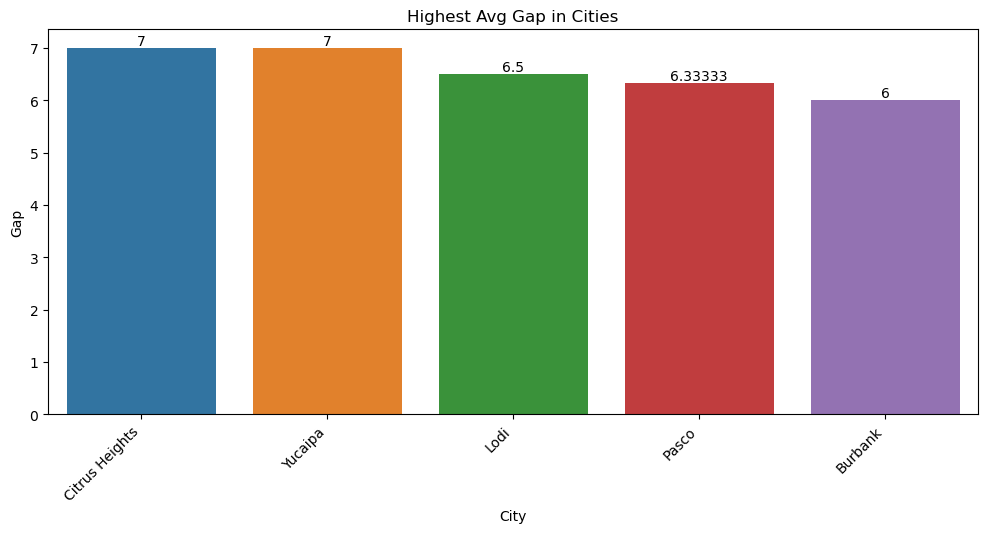

In [75]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=most_delay, x='City', y='Shipping_Delay')
plt.xlabel('City')
plt.ylabel('Gap')
plt.title('Highest Avg Gap in Cities')
plt.xticks(rotation=45, ha='right')
ShowLabels(ax)
plt.show()

*From the above graph we can see that <b>the highest average gap cities</b> are <b style='color:blue'>Citrus Heights</b> and <b style='color:red'>Yucaipa</b>.*

### 17) Lowest sales making customers
Comparing the emailIDs of the lowest sales making customers to know the lowest sale EmailID holder.

In [79]:
customers_by_sale=df.groupby('EmailID',as_index=False)['Sales'].sum()
print(customers_by_sale)

                         EmailID  Sales
0         AaronBergman@gmail.com    307
1         AaronHawkins@gmail.com   1327
2        AaronSmayling@gmail.com    736
3       AdamBellavance@gmail.com   2690
4             AdamHart@gmail.com    461
..                           ...    ...
681        XylonaPreis@gmail.com    656
682       YanaSorensen@gmail.com   5751
683      YosephCarroll@gmail.com   1214
684    ZuschussCarroll@gmail.com   2631
685  ZuschussDonatelli@gmail.com    304

[686 rows x 2 columns]


In [80]:
#lowest sales emailID holders
EmailID_sales_lowest=customers_by_sale.sort_values(by='Sales', ascending=True).head()
print(EmailID_sales_lowest)

                        EmailID  Sales
639      ThaisSissman@gmail.com      2
584     SaraLuxemburg@gmail.com      2
289        JackLebron@gmail.com      3
490  NeilFranzÃ¶sisch@gmail.com      4
623     StuartCalhoun@gmail.com      4


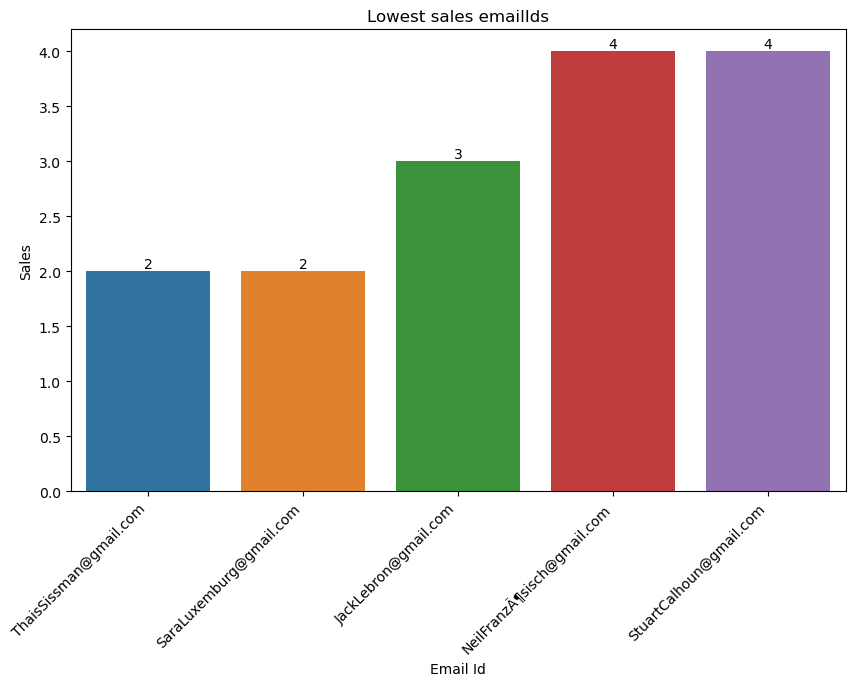

In [81]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=EmailID_sales_lowest, x='EmailID', y='Sales')
plt.xlabel('Email Id')
plt.ylabel('Sales')
plt.title('Lowest sales emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis from the above insight
*From the above graph we can see that <b>the lowest sales</b> were made by ThaisSissman@gmail.com and SaraLuxemburg@gmail.com.*

### 18) Highest sales making customers
Comparing the emailIDs of the highest sales making customers to know the highest sale EmailID holder.

In [82]:
#highest sales emailID holders
EmailID_sales_highest=customers_by_sale.sort_values(by='Sales', ascending=False).head()
print(EmailID_sales_highest) 

                     EmailID  Sales
539    RaymondBuch@gmail.com  14342
384    KenLonsdale@gmail.com   8468
214    EdwardHooks@gmail.com   7439
295       JaneWaco@gmail.com   7386
362  KarenFerguson@gmail.com   7178


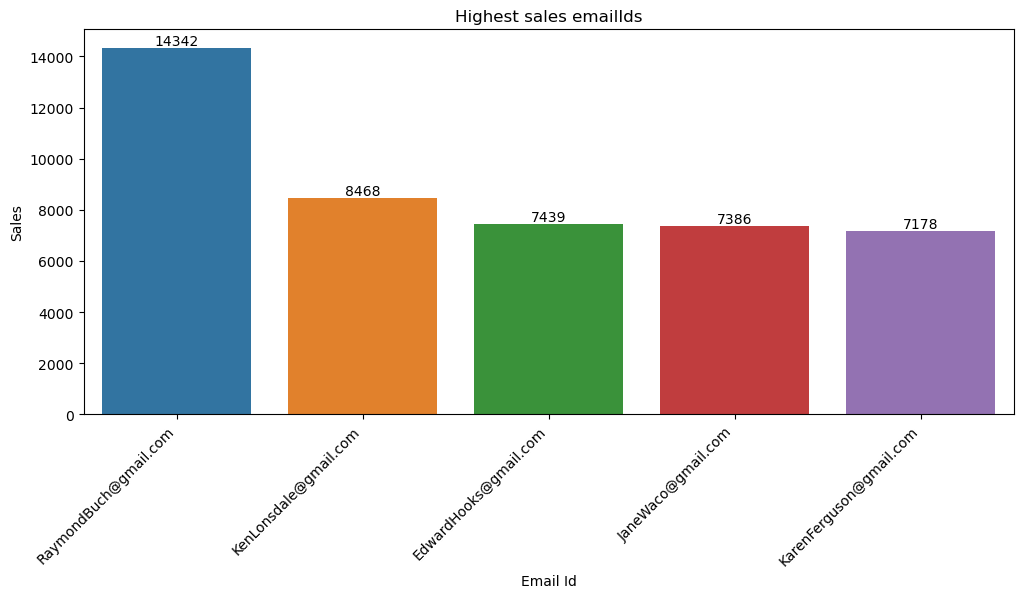

In [83]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=EmailID_sales_highest, x='EmailID', y='Sales')
plt.xlabel('Email Id')
plt.ylabel('Sales')
plt.title('Highest sales emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the highest sales</b> were made by RaymondBuch@gmail.com.*

### 19) Most non-profit making customers
Comparing the emailIDs of the non-profit making customers to know the most non-profit making EmailID holder.

In [84]:
customers_by_profit=df.groupby('EmailID',as_index=False)['Profit'].sum()
print(customers_by_profit)

                         EmailID  Profit
0         AaronBergman@gmail.com      13
1         AaronHawkins@gmail.com     177
2        AaronSmayling@gmail.com      20
3       AdamBellavance@gmail.com     361
4             AdamHart@gmail.com      96
..                           ...     ...
681        XylonaPreis@gmail.com     292
682       YanaSorensen@gmail.com    1550
683      YosephCarroll@gmail.com     381
684    ZuschussCarroll@gmail.com     342
685  ZuschussDonatelli@gmail.com      41

[686 rows x 2 columns]


In [85]:
#lowest profit making emailID holders
EmailID_nonprofit=customers_by_profit.sort_values(by='Profit', ascending=True).head()
print(EmailID_nonprofit)

                     EmailID  Profit
601  SharelleRoach@gmail.com   -3422
637   TanjaNorvell@gmail.com    -811
325     JimRadford@gmail.com    -785
541   ResiPÃ¶lking@gmail.com    -497
394  LaurelBeltran@gmail.com    -476


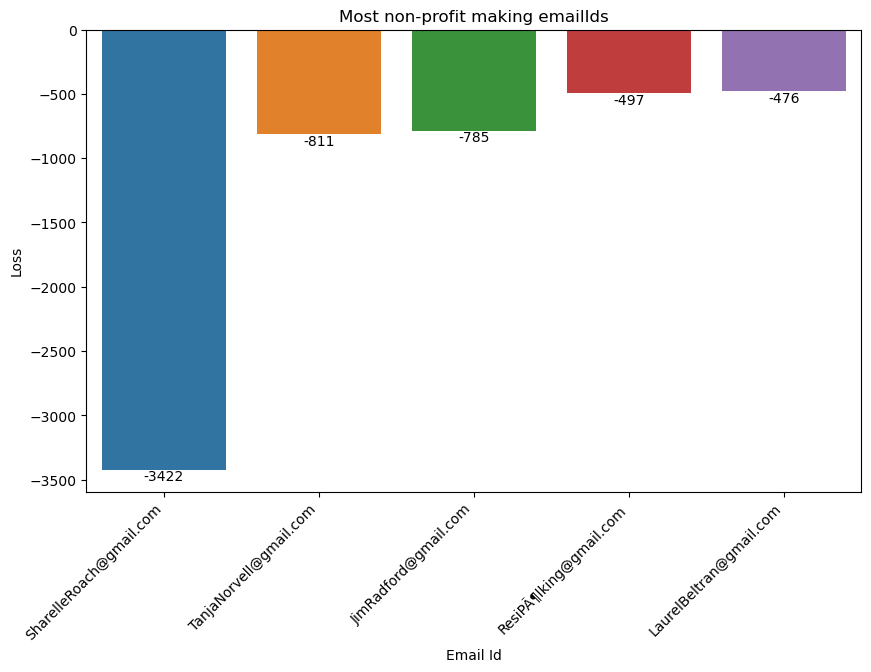

In [86]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=EmailID_nonprofit, x='EmailID', y='Profit')
plt.xlabel('Email Id')
plt.ylabel('Loss')
plt.title('Most non-profit making emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most non-profit making customer</b> is SharelleRoach@gmail.com.*

### 20) Most profit making customers
Comparing the emailIDs of the profit making customers to know the most profit making EmailID holder.

In [87]:
#highest profit making emailID holders
EmailID_profit=customers_by_profit.sort_values(by='Profit', ascending=False).head()
print(EmailID_profit)

                    EmailID  Profit
539   RaymondBuch@gmail.com    6804
295      JaneWaco@gmail.com    2072
249   FredHopkins@gmail.com    1988
194  DennisPardue@gmail.com    1786
556  RobertMarley@gmail.com    1596


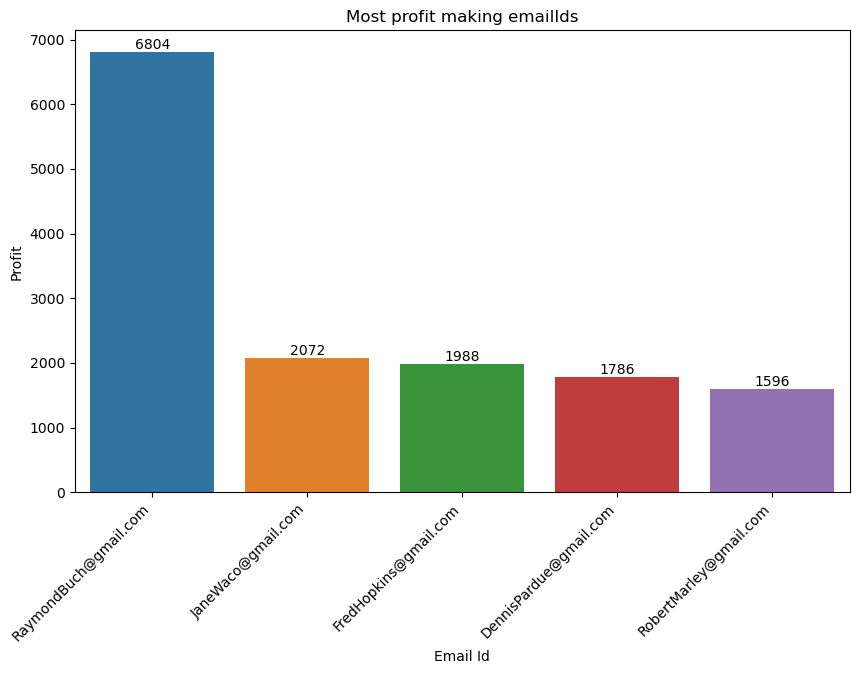

In [88]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=EmailID_profit, x='EmailID', y='Profit')
plt.xlabel('Email Id')
plt.ylabel('Profit')
plt.title('Most profit making emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above insight
*From the above graph we can see that <b>the most profit making customer</b> is RaymondBuch@gmail.com.*

### 21) Least quantity ordering customers
Comparing the emailIDs of the least quantity making customers to know the least quantity making EmailID holder.

In [89]:
customers_by_quantity=df.groupby('EmailID',as_index=False)['Quantity'].sum()
print(customers_by_quantity)

                         EmailID  Quantity
0         AaronBergman@gmail.com         7
1         AaronHawkins@gmail.com        23
2        AaronSmayling@gmail.com        12
3       AdamBellavance@gmail.com        15
4             AdamHart@gmail.com        16
..                           ...       ...
681        XylonaPreis@gmail.com        49
682       YanaSorensen@gmail.com        38
683      YosephCarroll@gmail.com         8
684    ZuschussCarroll@gmail.com        44
685  ZuschussDonatelli@gmail.com        12

[686 rows x 2 columns]


In [90]:
#lowest quantity ordering emailID holders
EmailID_leastqty=customers_by_quantity.sort_values(by='Quantity', ascending=True).head()
print(EmailID_leastqty)

                     EmailID  Quantity
584  SaraLuxemburg@gmail.com         1
558    RogerBarcio@gmail.com         1
532   PhillinaOber@gmail.com         1
82     BradNorvell@gmail.com         1
81    BobbyTrafton@gmail.com         1


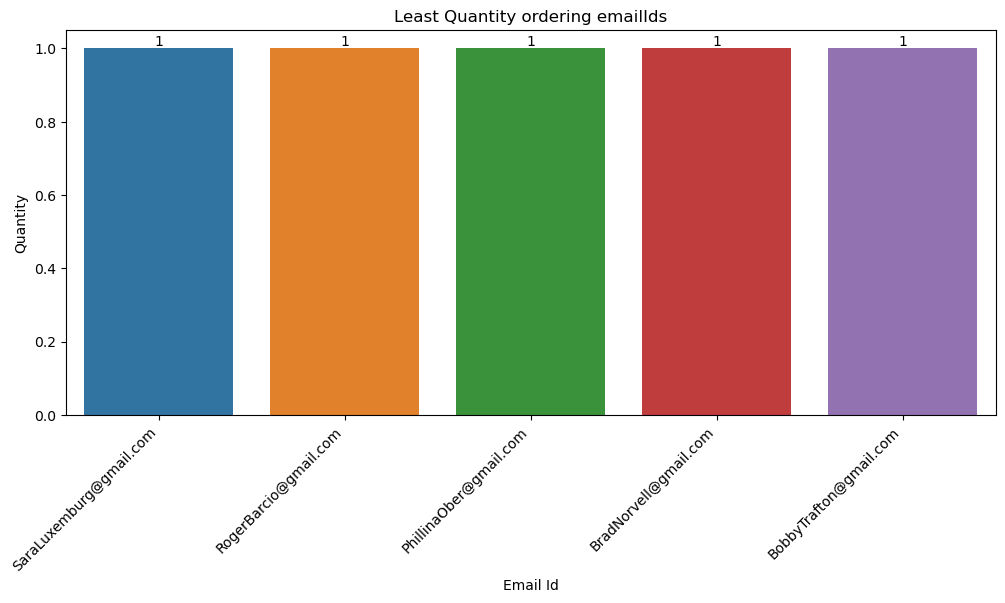

In [91]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(data=EmailID_leastqty, x='EmailID', y='Quantity')
plt.xlabel('Email Id')
plt.ylabel('Quantity')
plt.title('Least Quantity ordering emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above Insight
*From the above graph we can see that <b>the least quantity ordering customers</b> are SaraLuxemburg@gmail.com, RogerBarcio@gmail.com, PhillinaOber@gmail.com, BradNorvell@gmail.com and BobbyTrafton@gmail.com.*

### 22) Most quantity ordering customers
Comparing the emailIDs of the most quantity making customers to know the most quantity making EmailID holder.

In [92]:
#most quantity ordering emailID holders
EmailID_mostqty=customers_by_quantity.sort_values(by='Quantity', ascending=False).head()
print(EmailID_mostqty)

                        EmailID  Quantity
680      WilliamBrown@gmail.com        93
549        RickWilson@gmail.com        79
51      ArthurPrichep@gmail.com        76
618  StevenCartwright@gmail.com        74
264       GregGuthrie@gmail.com        72


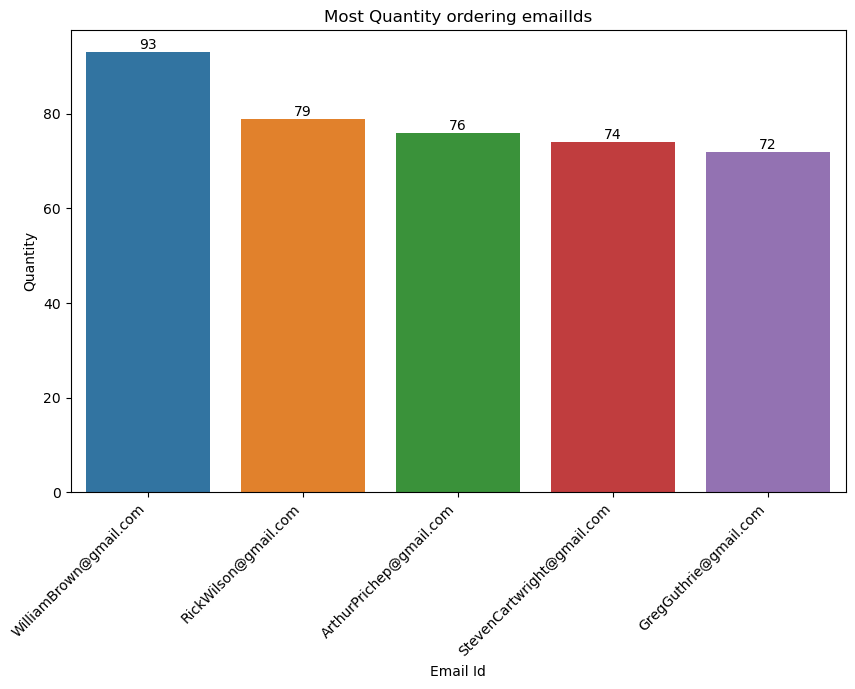

In [93]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=EmailID_mostqty, x='EmailID', y='Quantity')
plt.xlabel('Email Id')
plt.ylabel('Quantity')
plt.title('Most Quantity ordering emailIds')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above Insight
*From the above graph we can see that <b>the most quantity ordering emailID</b> is WilliamBrown@gmail.com .*

### 23) Most product category buying customer
Comparing the emailIDs of the customers according to the count of category to know the most product category buying customers.

In [94]:
ordered_emailID=df.groupby(['EmailID'],as_index=False)['Category'].count()
print(ordered_emailID)

                         EmailID  Category
0         AaronBergman@gmail.com         3
1         AaronHawkins@gmail.com         5
2        AaronSmayling@gmail.com         3
3       AdamBellavance@gmail.com         5
4             AdamHart@gmail.com         5
..                           ...       ...
681        XylonaPreis@gmail.com        12
682       YanaSorensen@gmail.com         7
683      YosephCarroll@gmail.com         2
684    ZuschussCarroll@gmail.com        16
685  ZuschussDonatelli@gmail.com         4

[686 rows x 2 columns]


In [95]:
#most ordering emailID holders
EmailID_most=ordered_emailID.sort_values(by='Category', ascending=False).head()
print(EmailID_most)

                       EmailID  Category
680     WilliamBrown@gmail.com        24
51     ArthurPrichep@gmail.com        23
549       RickWilson@gmail.com        19
264      GregGuthrie@gmail.com        17
684  ZuschussCarroll@gmail.com        16


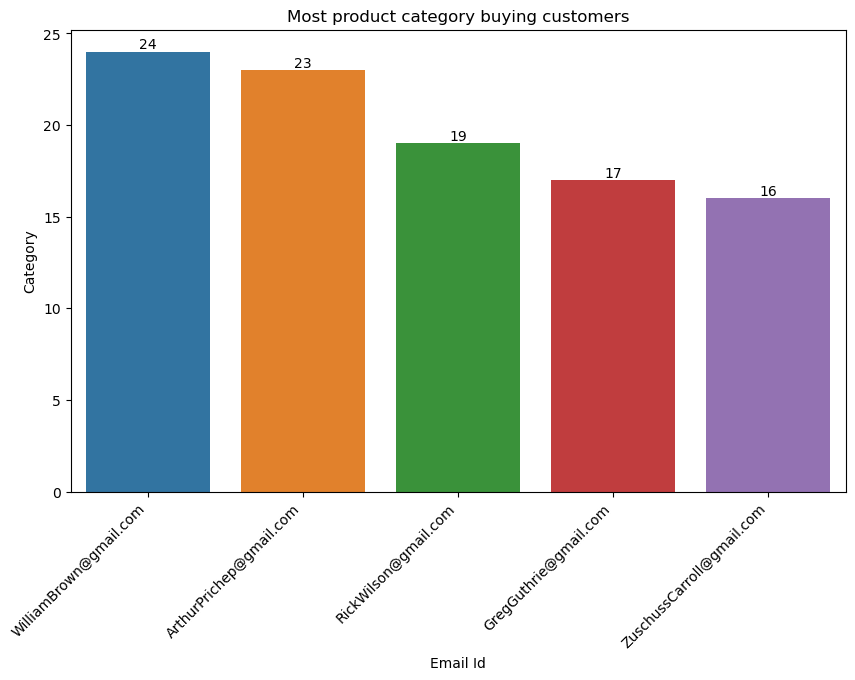

In [96]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=EmailID_most, x='EmailID', y='Category')
plt.xlabel('Email Id')
plt.ylabel('Category')
plt.title('Most product category buying customers')
plt.xticks(rotation=45, ha='right') 
ShowLabels(ax)
plt.show()

#### Research Analysis on the above Insight
*From the above graph we can see that <b>the most product category buying customer's emailID</b> is WilliamBrown@gmail.com .*

# Summary of the Project

## About states and cities of The United States Of America

### 1) California
It is the most demanded state with 2001 demands and highest profit of 75466. It is also the highest product sales state with 456493.

### 2) Wyoming 
It is the lowest demand state with only 1 demand and the lowest product sale state with 81603. Along with that it is also the state which has the highest average gap of 5 days between the order date and shipment date.

### 3) Los Angeles (California) 
It is the most demanded city with 747 demands with highest profit of 30099. It is also the highest product sales city with 175414.

### 4) Colorado
It is the most non profitable state with -(6543).

### 5) Louisville (Kentucky)
It is the most non profitable city with -(3408).

### 6) Everett (California) and San Luis Obispo (California) 
These are the lowest product sale cities by making a sale of 3 each.

### 7) Idaho
It is the state with least average gap of order date and ship date with 3.67 days.

### 8) Billings (montana)
It is the city with least average gap of order date and shipment date, that is, 0 which means that the order is made and shipped on the same day.

### 9) Citrus Heights (California)
It is the city with highest average gap of order date and shipment date that is 7 days.



## About the categories of the products sold

### 1) Chairs
It is the most sold category by total sales of 101673.

### 2) Fasteners
It is the least sold category by total sales of 883.

### 3) Binders 
It is the most preferred product category among customers by selling a total quantity of 1868.

### 4) Copiers
It is the least preferred productcategory among customers by selling a total quantity of 88.



## About the consumers

### 1) RaymondButch@gmail.com
It is the highest sales making customer with 14342 and highest profit of 6804.

### 2) Williambrown@gmail.com
It is the most quantity ordering customer with 93 quantities and highest product categories of 24.

### 3) SharalleRoach@gmail.com 
It is the most nonprofit making customer with -(3422).

### 4) ThaisSissman@gmail.com  and SaraLuxemburg@gmail.com 
These are the lowest sales making customers with sale of 2 each.

# Final Conclusion of the Project

*Amazon has already grabbed a good customer place in Los Angeles, California because among 2001 demands it has single-handedly grabbed 747. However, Amazon should focus more on the marketing strategy of Wyoming because it was the state with only 1 demand due to which it had the maximum gap in order date and shipment date.*

*Along with that working on the production of the Binders category is important to keep it in stock all the time because it is the product category with maximum ordered quantities. So this should remain in stock for more consumers to purchase. The same is true with the chairs category as it made the highest sale among all the others. However, Amazon needs to work on its marketing strategies for product categories like Fasteners which has made the lowest sales, and Copiers which has the lowest quantity sold.*